In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML

In [2]:
import torch
import numpy as np
import networkx as nx
import os

In [3]:
results_dir = "../results/2021-08-01_09-45_dist_dense_tuning1"

results1 = torch.load(os.path.join(results_dir, "vanilla_cadmm_results.pt"), map_location=torch.device("cpu"))
results1.keys()


dict_keys(['forward_pass_count', 'validation_loss', 'consensus_error', 'mesh_grid_density', 'current_epoch', 'mesh_inputs'])

# Communication Graph

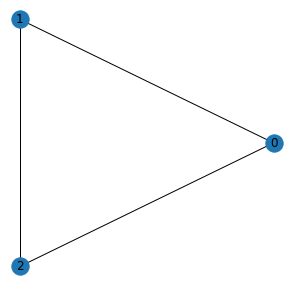

In [4]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)

# Validation loss

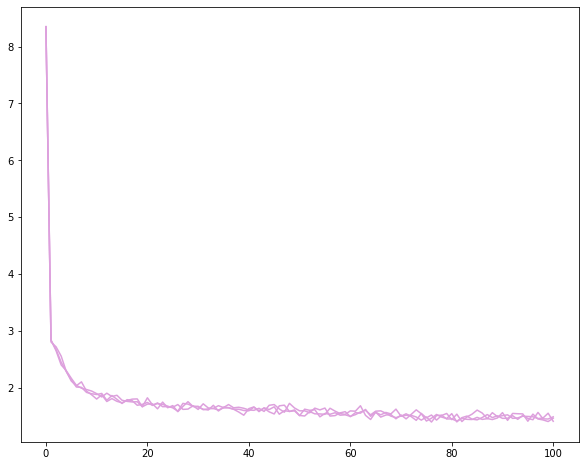

In [5]:
vl1 = torch.stack(results1["validation_loss"])

(fig, ax) = plt.subplots(figsize=(10, 8))

ax.plot(vl1, color="plum")

# Denisty Plot

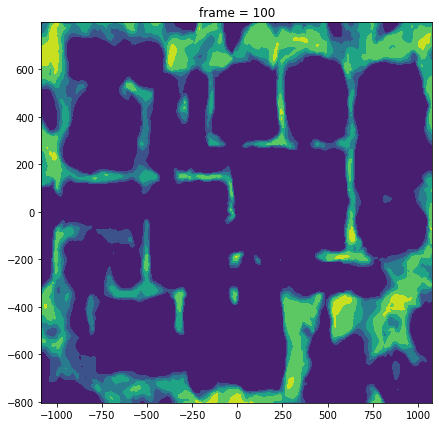

In [11]:

dens1 = results1["mesh_grid_density"]
locs = results1["mesh_inputs"]

num_frames = len(dens1)
agent = 0

(fig, ax) = plt.subplots(figsize=(7, 7))

def animate(i):
    global cont
    z = (torch.squeeze(dens1[i]))[agent, :]
    ax.tricontourf(locs[:, 0], locs[:, 1], z)
    ax.set_title("frame = {}".format(i))

anim = animation.FuncAnimation(fig, animate, frames=num_frames, repeat=True)
anim.save("density_animation.mp4")